In [142]:
import csv
import seaborn as sns
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from datetime import datetime, date

In [2]:
nodes = pd.read_csv('UofT_nodes.csv')

In [3]:
nodes.head(50)

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0
5,1969-05-22,2011-10-03,89.0,1,1,0.0,4274.825,8.0,10454.469,25.0,456359.0,107.0,276603.0,164.0,Low,Low,low,Mary Gilmore an,Female,2473.0
6,1951-03-31,2007-08-07,89.0,1,1,0.0,6535.232,8.0,7059.521,21.0,74927.0,17.0,139436.0,58.0,Low,Low,low,Jacqueline Thompson Burke Spann,Female,568597.0
7,1986-08-26,2012-11-26,89.0,1,1,0.0,316.046,0.0,3894.914,16.0,335104.0,93.0,205929.0,205.0,Low,Low,low,"Alderson, James Mccombs Wilcox",Male,395257.0
8,2002-06-24,2012-11-28,89.0,1,1,0.0,4684.540,9.0,1851.315,9.0,348805.0,83.0,521669.0,257.0,Low,Low,low,"Morris, Maria Bitto Minnick",Female,590694.0
9,1968-01-13,1997-12-23,89.0,1,1,0.0,3657.827,6.0,13503.562,35.0,413181.0,108.0,451743.0,315.0,Low,Low,low,"Mcneil, Jennifer Delargy Park",Female,738891.0


In [4]:
occupation = pd.read_csv('UofT_occupation_risk.csv')

In [5]:
occupation.head(50)

,code,occupation_risk
0,0,Low
1,1,High
2,2,Low
3,3,Low
4,4,Low
5,5,Low
6,6,Low
7,7,Moderate
8,8,Low
9,9,Low


In [6]:
merged_df = pd.merge(nodes, occupation, left_on = 'OCPTN_NM', right_on = 'code', how = 'left')

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
merged_df

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID,code,occupation_risk
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0,89.0,High
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0,89.0,High
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0,89.0,High
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0,89.0,High
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0,89.0,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1939-01-16,1994-03-19,467.0,0,1,0.0,18945.108,10.0,32210.000,21.0,1186467.0,25.0,2550098.0,174.0,Low,High,high,Bret* Dove Gainey,Male,420884.0,467.0,Low
999996,1970-12-13,1995-12-22,467.0,0,1,0.0,5775.601,7.0,5015.741,15.0,244504.0,53.0,417992.0,337.0,Low,Low,low,Anthony Ray Montano Gomez,Male,429418.0,467.0,Low
999997,1958-09-09,2010-11-03,65.0,0,1,0.0,2351.255,2.0,15997.000,19.0,3024271.0,68.0,948981.0,124.0,Low,High,high,Bernadette Schofield Pace Mile,Female,731360.0,65.0,High
999998,1983-09-15,2013-01-30,231.0,0,1,0.0,27312.613,8.0,3399.000,5.0,943477.0,9.0,376429.0,12.0,Low,High,high,"Wasson, Russell Terrell",Male,837988.0,231.0,High


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   BIRTH_DT                1000000 non-null  object 
 1   CUST_ADD_DT             995822 non-null   object 
 2   OCPTN_NM                993616 non-null   float64
 3   RES_CNTRY_CA            1000000 non-null  int64  
 4   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 5   PEP_FL                  1000000 non-null  float64
 6   CASH_SUM_IN             1000000 non-null  float64
 7   CASH_CNT_IN             1000000 non-null  float64
 8   CASH_SUM_OUT            1000000 non-null  float64
 9   CASH_CNT_OUT            1000000 non-null  float64
 10  WIRES_SUM_IN            1000000 non-null  float64
 11  WIRES_CNT_IN            1000000 non-null  float64
 12  WIRES_SUM_OUT           1000000 non-null  float64
 13  WIRES_CNT_OUT           1000000 non-null  float64
 14  COU

In [10]:
merged_df.describe()

,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,CUSTOMER_ID,code
count,993616.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1.000000e+06,993616.000000
mean,381.329028,0.985686,0.98855,0.097489,15062.980362,8.596567,23353.115677,23.146121,3.411956e+06,85.394548,1.382649e+06,152.431128,5.003547e+05,381.329028
std,302.806156,0.118782,0.10639,0.296623,20323.375203,8.426340,33337.695394,20.867079,5.754767e+06,66.773057,2.165856e+06,120.158287,2.888723e+05,302.806156
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,89.000000,1.000000,1.00000,0.000000,2575.721000,3.000000,3419.478250,8.000000,1.209508e+05,33.000000,1.053308e+05,59.000000,2.501808e+05,89.000000
50%,354.000000,1.000000,1.00000,0.000000,5983.672500,6.000000,8001.721500,17.000000,2.981515e+05,71.000000,2.550340e+05,126.000000,5.003765e+05,354.000000
75%,724.000000,1.000000,1.00000,0.000000,19206.000000,11.000000,29862.000000,32.000000,4.688108e+06,122.000000,1.926422e+06,218.000000,7.505282e+05,724.000000
max,840.000000,1.000000,1.00000,1.000000,188953.000000,79.000000,310117.000000,203.000000,4.781359e+07,605.000000,1.893074e+07,1083.000000,1.000677e+06,840.000000


In [11]:
#change BIRTH_DT into Age
merged_df['BIRTH_DT'] = pd.to_datetime(merged_df['BIRTH_DT'], format='%Y-%m-%d')
merged_df['BIRTH_DT'] = merged_df['BIRTH_DT'].dt.date

today = datetime.now().date()
merged_df['AGE'] = today - merged_df['BIRTH_DT']
merged_df['AGE'] = merged_df['AGE'].dt.days // 365

In [12]:
#change CUST_ADD_DT into date at bank
merged_df['CUST_ADD_DT'] = pd.to_datetime(merged_df['CUST_ADD_DT'], format = '%Y-%m-%d')
merged_df['CUST_ADD_DT'] = merged_df['CUST_ADD_DT'].dt.date

today = datetime.now().date()
merged_df['YEAR_AT_BANK'] = today - merged_df['CUST_ADD_DT']
merged_df['YEAR_AT_BANK'] = merged_df['YEAR_AT_BANK'].dt.days // 365

In [13]:
merged_df

,BIRTH_DT,CUST_ADD_DT,OCPTN_NM,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_CNT_IN,CASH_SUM_OUT,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_CNT_IN,WIRES_SUM_OUT,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,RISK,NAME,GENDER,CUSTOMER_ID,code,occupation_risk,AGE,YEAR_AT_BANK
0,1981-09-01,2007-07-05,89.0,1,1,0.0,2577.785,2.0,2851.663,7.0,70774.0,62.0,24244.0,35.0,Low,Low,low,"Young, Marie Mildren Coleman",Female,935382.0,89.0,High,41,15.0
1,1994-02-21,2019-05-19,89.0,1,1,0.0,3035.502,2.0,4805.997,15.0,282929.0,76.0,196439.0,152.0,Low,Low,low,Mark Stupar Lecy,Male,2305.0,89.0,High,29,3.0
2,1962-11-16,2011-08-02,89.0,1,1,0.0,1617.571,1.0,3482.809,11.0,7632.0,6.0,33598.0,20.0,Low,Low,low,Dean Glasper Wendel Reeves,Male,472403.0,89.0,High,60,11.0
3,1998-06-20,2001-08-15,89.0,1,1,0.0,3587.042,5.0,1940.943,8.0,149253.0,71.0,105896.0,238.0,Low,Low,low,"Hulsey, Linda Rauth",Female,227994.0,89.0,High,24,21.0
4,1942-01-24,2012-10-28,89.0,1,1,0.0,1725.524,2.0,13197.169,43.0,92318.0,96.0,187403.0,180.0,Low,Low,low,Carolyn Washington Roberts,Female,418265.0,89.0,High,81,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1939-01-16,1994-03-19,467.0,0,1,0.0,18945.108,10.0,32210.000,21.0,1186467.0,25.0,2550098.0,174.0,Low,High,high,Bret* Dove Gainey,Male,420884.0,467.0,Low,84,28.0
999996,1970-12-13,1995-12-22,467.0,0,1,0.0,5775.601,7.0,5015.741,15.0,244504.0,53.0,417992.0,337.0,Low,Low,low,Anthony Ray Montano Gomez,Male,429418.0,467.0,Low,52,27.0
999997,1958-09-09,2010-11-03,65.0,0,1,0.0,2351.255,2.0,15997.000,19.0,3024271.0,68.0,948981.0,124.0,Low,High,high,Bernadette Schofield Pace Mile,Female,731360.0,65.0,High,64,12.0
999998,1983-09-15,2013-01-30,231.0,0,1,0.0,27312.613,8.0,3399.000,5.0,943477.0,9.0,376429.0,12.0,Low,High,high,"Wasson, Russell Terrell",Male,837988.0,231.0,High,39,10.0


In [14]:
cols = ['CUSTOMER_ID', 'NAME', 'AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'CASH_SUM_IN', 'CASH_SUM_OUT', 'CASH_CNT_IN', 'CASH_CNT_OUT', 'WIRES_SUM_IN', 'WIRES_SUM_OUT', 'WIRES_CNT_IN', 'WIRES_CNT_OUT', 'COUNTRY_RISK_INCOME', 'COUNTRY_RISK_RESIDENCY', 'occupation_risk', 'YEAR_AT_BANK', 'RISK']

In [15]:
new_df = merged_df[cols]

In [16]:
new_df

,CUSTOMER_ID,NAME,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_SUM_OUT,CASH_CNT_IN,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_SUM_OUT,WIRES_CNT_IN,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,YEAR_AT_BANK,RISK
0,935382.0,"Young, Marie Mildren Coleman",41,Female,1,1,0.0,2577.785,2851.663,2.0,7.0,70774.0,24244.0,62.0,35.0,Low,Low,High,15.0,low
1,2305.0,Mark Stupar Lecy,29,Male,1,1,0.0,3035.502,4805.997,2.0,15.0,282929.0,196439.0,76.0,152.0,Low,Low,High,3.0,low
2,472403.0,Dean Glasper Wendel Reeves,60,Male,1,1,0.0,1617.571,3482.809,1.0,11.0,7632.0,33598.0,6.0,20.0,Low,Low,High,11.0,low
3,227994.0,"Hulsey, Linda Rauth",24,Female,1,1,0.0,3587.042,1940.943,5.0,8.0,149253.0,105896.0,71.0,238.0,Low,Low,High,21.0,low
4,418265.0,Carolyn Washington Roberts,81,Female,1,1,0.0,1725.524,13197.169,2.0,43.0,92318.0,187403.0,96.0,180.0,Low,Low,High,10.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,420884.0,Bret* Dove Gainey,84,Male,0,1,0.0,18945.108,32210.000,10.0,21.0,1186467.0,2550098.0,25.0,174.0,Low,High,Low,28.0,high
999996,429418.0,Anthony Ray Montano Gomez,52,Male,0,1,0.0,5775.601,5015.741,7.0,15.0,244504.0,417992.0,53.0,337.0,Low,Low,Low,27.0,low
999997,731360.0,Bernadette Schofield Pace Mile,64,Female,0,1,0.0,2351.255,15997.000,2.0,19.0,3024271.0,948981.0,68.0,124.0,Low,High,High,12.0,high
999998,837988.0,"Wasson, Russell Terrell",39,Male,0,1,0.0,27312.613,3399.000,8.0,5.0,943477.0,376429.0,9.0,12.0,Low,High,High,10.0,high


In [17]:
new_df.corr()

,CUSTOMER_ID,AGE,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_SUM_OUT,CASH_CNT_IN,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_SUM_OUT,WIRES_CNT_IN,WIRES_CNT_OUT,YEAR_AT_BANK
CUSTOMER_ID,1.000000,-0.000689,-0.001143,0.001191,-0.001315,0.000093,-0.000088,0.000630,-0.000459,-0.000155,0.000297,-0.001296,0.000023,-0.000537
AGE,-0.000689,1.000000,-0.033416,-0.007505,0.066777,0.049283,0.125491,0.001729,0.100060,0.149052,0.155170,-0.021312,-0.039627,0.561433
RES_CNTRY_CA,-0.001143,-0.033416,1.000000,0.029049,-0.026723,-0.063550,-0.054083,-0.039347,-0.015968,-0.066683,-0.075422,0.037485,0.021660,0.026343
CNTRY_OF_INCOME_CA,0.001191,-0.007505,0.029049,1.000000,-0.007470,-0.015280,-0.008478,-0.010457,-0.001588,-0.008690,-0.010397,0.009957,0.005815,0.010646
PEP_FL,-0.001315,0.066777,-0.026723,-0.007470,1.000000,0.199309,0.226687,0.143242,0.162801,0.204057,0.197912,0.103780,0.080394,0.119687
CASH_SUM_IN,0.000093,0.049283,-0.063550,-0.015280,0.199309,1.000000,0.586298,0.915346,0.469528,0.473499,0.499819,0.255888,0.316364,0.009447
CASH_SUM_OUT,-0.000088,0.125491,-0.054083,-0.008478,0.226687,0.586298,1.000000,0.512216,0.851496,0.623890,0.628060,0.375184,0.421984,0.135156
CASH_CNT_IN,0.000630,0.001729,-0.039347,-0.010457,0.143242,0.915346,0.512216,1.000000,0.475869,0.362159,0.395442,0.275431,0.357508,-0.009131
CASH_CNT_OUT,-0.000459,0.100060,-0.015968,-0.001588,0.162801,0.469528,0.851496,0.475869,1.000000,0.447223,0.467904,0.479200,0.547312,0.159570
WIRES_SUM_IN,-0.000155,0.149052,-0.066683,-0.008690,0.204057,0.473499,0.623890,0.362159,0.447223,1.000000,0.864838,0.404182,0.336000,0.126755


<AxesSubplot:>

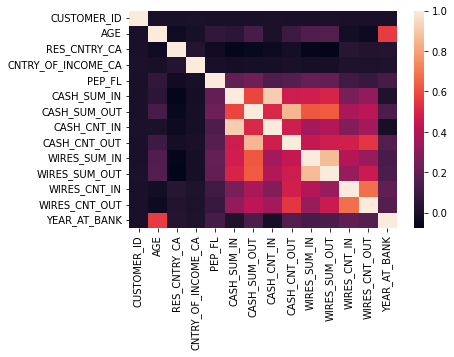

In [18]:
sns.heatmap(new_df.corr())

In [19]:
columns = ['AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'CASH_SUM_IN', 'CASH_SUM_OUT', 'CASH_CNT_IN', 'CASH_CNT_OUT', 'WIRES_SUM_IN', 'WIRES_SUM_OUT', 'WIRES_CNT_IN', 'WIRES_CNT_OUT', 'YEAR_AT_BANK', 'RISK']
data = new_df[columns]

In [20]:
data

,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_SUM_OUT,CASH_CNT_IN,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_SUM_OUT,WIRES_CNT_IN,WIRES_CNT_OUT,YEAR_AT_BANK,RISK
0,41,Female,1,1,0.0,2577.785,2851.663,2.0,7.0,70774.0,24244.0,62.0,35.0,15.0,low
1,29,Male,1,1,0.0,3035.502,4805.997,2.0,15.0,282929.0,196439.0,76.0,152.0,3.0,low
2,60,Male,1,1,0.0,1617.571,3482.809,1.0,11.0,7632.0,33598.0,6.0,20.0,11.0,low
3,24,Female,1,1,0.0,3587.042,1940.943,5.0,8.0,149253.0,105896.0,71.0,238.0,21.0,low
4,81,Female,1,1,0.0,1725.524,13197.169,2.0,43.0,92318.0,187403.0,96.0,180.0,10.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,84,Male,0,1,0.0,18945.108,32210.000,10.0,21.0,1186467.0,2550098.0,25.0,174.0,28.0,high
999996,52,Male,0,1,0.0,5775.601,5015.741,7.0,15.0,244504.0,417992.0,53.0,337.0,27.0,low
999997,64,Female,0,1,0.0,2351.255,15997.000,2.0,19.0,3024271.0,948981.0,68.0,124.0,12.0,high
999998,39,Male,0,1,0.0,27312.613,3399.000,8.0,5.0,943477.0,376429.0,9.0,12.0,10.0,high


In [21]:
# Read in the UofT_edges.csv, it concludes the source customer id and target customer id and the emt amount. 
edges = pd.read_csv('UofT_edges.csv')
edges

,source,target,emt
0,983859.0,544485.0,503.807815
1,605618.0,362627.0,5157.568486
2,323189.0,118238.0,498.628481
3,919153.0,983859.0,401.962668
4,995748.0,983859.0,5095.458776
...,...,...,...
466228,743092.0,307628.0,2959.506391
466229,420266.0,489593.0,208.011081
466230,441447.0,877470.0,2221.199295
466231,444883.0,137297.0,1175.932049


In [22]:
# merging the emt data to the nodes dataset
edges['EMT_AVG_OUT'] = edges.groupby('source')['emt'].transform(lambda x: x.sum())
edges['EMT_AVG_IN'] = edges.groupby('target')['emt'].transform(lambda x: x.sum())
EMT_AVG_OUT = edges[['source', 'EMT_AVG_OUT']].drop_duplicates(keep='last')
EMT_AVG_IN = edges[['target', 'EMT_AVG_IN']].drop_duplicates(keep='last')
# adding emt_out
new_df = new_df.merge(EMT_AVG_OUT, left_on='CUSTOMER_ID',right_on = 'source', how='left').drop(columns = ['source'])
# adding emt_in
new_df = new_df.merge(EMT_AVG_IN, left_on='CUSTOMER_ID',right_on = 'target', how='left').drop(columns = ['target'])

In [69]:
# SUM/CNT
new_df['CASH_AVG_IN'] = new_df['CASH_SUM_IN'] / new_df['CASH_CNT_IN']
new_df['CASH_AVG_OUT'] = new_df['CASH_SUM_OUT'] / new_df['CASH_CNT_OUT']

new_df['WIRES_AVG_IN'] = new_df['WIRES_SUM_IN'] / new_df['WIRES_CNT_IN']
new_df['WIRES_AVG_OUT'] = new_df['WIRES_SUM_OUT'] / new_df['WIRES_CNT_OUT']

In [70]:
#missing value in AVG
new_df['CASH_AVG_IN'] = new_df['CASH_AVG_IN'].fillna(0)
new_df['CASH_AVG_OUT'] = new_df['CASH_AVG_OUT'].fillna(0)

new_df['WIRES_AVG_IN'] = new_df['WIRES_AVG_IN'].fillna(0)
new_df['WIRES_AVG_OUT'] = new_df['WIRES_AVG_OUT'].fillna(0)

In [71]:
#infinite value in AVG
new_df['CASH_AVG_IN'] = new_df['CASH_AVG_IN'].replace(max(new_df['CASH_AVG_IN']))
new_df['CASH_AVG_OUT'] = new_df['CASH_AVG_OUT'].replace(max(new_df['CASH_AVG_OUT']))

new_df['WIRES_AVG_IN'] = new_df['WIRES_AVG_IN'].replace(max(new_df['WIRES_AVG_IN']))
new_df['WIRES_AVG_OUT'] = new_df['WIRES_AVG_OUT'].replace(max(new_df['WIRES_AVG_OUT']))

In [72]:
new_df

,CUSTOMER_ID,NAME,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_SUM_OUT,CASH_CNT_IN,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_SUM_OUT,WIRES_CNT_IN,WIRES_CNT_OUT,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,YEAR_AT_BANK,RISK,EMT_AVG_OUT,EMT_AVG_IN,CASH_AVG_IN,CASH_AVG_OUT,WIRES_AVG_IN,WIRES_AVG_OUT
0,935382.0,"Young, Marie Mildren Coleman",41,Female,1,1,0.0,2577.785,2851.663,2.0,7.0,70774.0,24244.0,62.0,35.0,Low,Low,High,15.0,low,NaN,NaN,1288.892500,407.380429,1141.516129,692.685714
1,2305.0,Mark Stupar Lecy,29,Male,1,1,0.0,3035.502,4805.997,2.0,15.0,282929.0,196439.0,76.0,152.0,Low,Low,High,3.0,low,NaN,NaN,1517.751000,320.399800,3722.750000,1292.361842
2,472403.0,Dean Glasper Wendel Reeves,60,Male,1,1,0.0,1617.571,3482.809,1.0,11.0,7632.0,33598.0,6.0,20.0,Low,Low,High,11.0,low,NaN,NaN,1617.571000,316.619000,1272.000000,1679.900000
3,227994.0,"Hulsey, Linda Rauth",24,Female,1,1,0.0,3587.042,1940.943,5.0,8.0,149253.0,105896.0,71.0,238.0,Low,Low,High,21.0,low,NaN,NaN,717.408400,242.617875,2102.154930,444.941176
4,418265.0,Carolyn Washington Roberts,81,Female,1,1,0.0,1725.524,13197.169,2.0,43.0,92318.0,187403.0,96.0,180.0,Low,Low,High,10.0,low,NaN,NaN,862.762000,306.910907,961.645833,1041.127778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,420884.0,Bret* Dove Gainey,84,Male,0,1,0.0,18945.108,32210.000,10.0,21.0,1186467.0,2550098.0,25.0,174.0,Low,High,Low,28.0,high,3418.392838,5002.493403,1894.510800,1533.809524,47458.680000,14655.735632
999996,429418.0,Anthony Ray Montano Gomez,52,Male,0,1,0.0,5775.601,5015.741,7.0,15.0,244504.0,417992.0,53.0,337.0,Low,Low,Low,27.0,low,NaN,2955.912041,825.085857,334.382733,4613.283019,1240.332344
999997,731360.0,Bernadette Schofield Pace Mile,64,Female,0,1,0.0,2351.255,15997.000,2.0,19.0,3024271.0,948981.0,68.0,124.0,Low,High,High,12.0,high,9927.441977,4287.453681,1175.627500,841.947368,44474.573529,7653.072581
999998,837988.0,"Wasson, Russell Terrell",39,Male,0,1,0.0,27312.613,3399.000,8.0,5.0,943477.0,376429.0,9.0,12.0,Low,High,High,10.0,high,588.008938,9419.317616,3414.076625,679.800000,104830.777778,31369.083333


In [73]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 26 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   CUSTOMER_ID             1000000 non-null  float64
 1   NAME                    999340 non-null   object 
 2   AGE                     1000000 non-null  int64  
 3   GENDER                  999372 non-null   object 
 4   RES_CNTRY_CA            1000000 non-null  int64  
 5   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 6   PEP_FL                  1000000 non-null  float64
 7   CASH_SUM_IN             1000000 non-null  float64
 8   CASH_SUM_OUT            1000000 non-null  float64
 9   CASH_CNT_IN             1000000 non-null  float64
 10  CASH_CNT_OUT            1000000 non-null  float64
 11  WIRES_SUM_IN            1000000 non-null  float64
 12  WIRES_SUM_OUT           1000000 non-null  float64
 13  WIRES_CNT_IN            1000000 non-null  float64
 14  WIR

In [74]:
new_df.corr()

,CUSTOMER_ID,AGE,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_SUM_IN,CASH_SUM_OUT,CASH_CNT_IN,CASH_CNT_OUT,WIRES_SUM_IN,WIRES_SUM_OUT,WIRES_CNT_IN,WIRES_CNT_OUT,YEAR_AT_BANK,EMT_AVG_OUT,EMT_AVG_IN,CASH_AVG_IN,CASH_AVG_OUT,WIRES_AVG_IN,WIRES_AVG_OUT
CUSTOMER_ID,1.000000,-0.000689,-0.001143,0.001191,-0.001315,0.000093,-0.000088,0.000630,-0.000459,-0.000155,0.000297,-0.001296,0.000023,-0.000537,0.000674,0.002474,0.000058,0.000706,0.001230,0.001655
AGE,-0.000689,1.000000,-0.033416,-0.007505,0.066777,0.049283,0.125491,0.001729,0.100060,0.149052,0.155170,-0.021312,-0.039627,0.561433,0.029507,0.025178,0.136867,0.155423,0.097969,0.099182
RES_CNTRY_CA,-0.001143,-0.033416,1.000000,0.029049,-0.026723,-0.063550,-0.054083,-0.039347,-0.015968,-0.066683,-0.075422,0.037485,0.021660,0.026343,-0.027124,-0.024697,-0.106989,-0.111000,-0.091244,-0.076092
CNTRY_OF_INCOME_CA,0.001191,-0.007505,0.029049,1.000000,-0.007470,-0.015280,-0.008478,-0.010457,-0.001588,-0.008690,-0.010397,0.009957,0.005815,0.010646,-0.014259,-0.012123,-0.020929,-0.019386,-0.013199,-0.010371
PEP_FL,-0.001315,0.066777,-0.026723,-0.007470,1.000000,0.199309,0.226687,0.143242,0.162801,0.204057,0.197912,0.103780,0.080394,0.119687,0.087438,0.088759,0.280009,0.236818,0.061895,0.071642
CASH_SUM_IN,0.000093,0.049283,-0.063550,-0.015280,0.199309,1.000000,0.586298,0.915346,0.469528,0.473499,0.499819,0.255888,0.316364,0.009447,0.147635,0.150240,0.509977,0.439351,0.130086,0.104192
CASH_SUM_OUT,-0.000088,0.125491,-0.054083,-0.008478,0.226687,0.586298,1.000000,0.512216,0.851496,0.623890,0.628060,0.375184,0.421984,0.135156,0.106419,0.105057,0.454964,0.503153,0.129697,0.094108
CASH_CNT_IN,0.000630,0.001729,-0.039347,-0.010457,0.143242,0.915346,0.512216,1.000000,0.475869,0.362159,0.395442,0.275431,0.357508,-0.009131,0.113956,0.115193,0.261060,0.298687,0.063112,0.042341
CASH_CNT_OUT,-0.000459,0.100060,-0.015968,-0.001588,0.162801,0.469528,0.851496,0.475869,1.000000,0.447223,0.467904,0.479200,0.547312,0.159570,0.071646,0.069497,0.247616,0.184270,0.020462,-0.002149
WIRES_SUM_IN,-0.000155,0.149052,-0.066683,-0.008690,0.204057,0.473499,0.623890,0.362159,0.447223,1.000000,0.864838,0.404182,0.336000,0.126755,0.097111,0.094260,0.520910,0.528046,0.269735,0.238521


<AxesSubplot:>

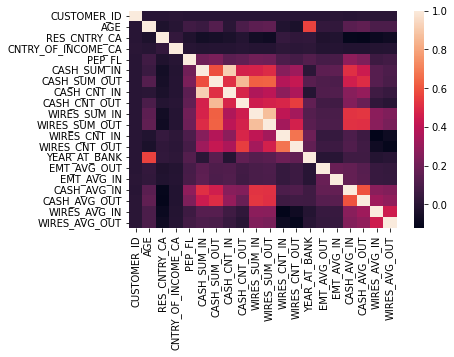

In [75]:
sns.heatmap(new_df.corr())

## Logistic Regression (Inclue EMT)

In [76]:
cols = ['AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'COUNTRY_RISK_INCOME', 'COUNTRY_RISK_RESIDENCY', 'occupation_risk', 'CASH_AVG_IN', 'CASH_AVG_OUT', 'WIRES_AVG_IN', 'WIRES_AVG_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
logreg_df_1 = new_df[cols]

In [77]:
logreg_df_1.corr()

,AGE,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_AVG_IN,CASH_AVG_OUT,WIRES_AVG_IN,WIRES_AVG_OUT,YEAR_AT_BANK,EMT_AVG_IN,EMT_AVG_OUT
AGE,1.000000,-0.033416,-0.007505,0.066777,0.136867,0.155423,0.097969,0.099182,0.561433,0.025178,0.029507
RES_CNTRY_CA,-0.033416,1.000000,0.029049,-0.026723,-0.106989,-0.111000,-0.091244,-0.076092,0.026343,-0.024697,-0.027124
CNTRY_OF_INCOME_CA,-0.007505,0.029049,1.000000,-0.007470,-0.020929,-0.019386,-0.013199,-0.010371,0.010646,-0.012123,-0.014259
PEP_FL,0.066777,-0.026723,-0.007470,1.000000,0.280009,0.236818,0.061895,0.071642,0.119687,0.088759,0.087438
CASH_AVG_IN,0.136867,-0.106989,-0.020929,0.280009,1.000000,0.594949,0.267537,0.247047,0.063213,0.165546,0.164923
CASH_AVG_OUT,0.155423,-0.111000,-0.019386,0.236818,0.594949,1.000000,0.317431,0.284192,0.065683,0.132254,0.129508
WIRES_AVG_IN,0.097969,-0.091244,-0.013199,0.061895,0.267537,0.317431,1.000000,0.444820,-0.013489,0.041170,0.040702
WIRES_AVG_OUT,0.099182,-0.076092,-0.010371,0.071642,0.247047,0.284192,0.444820,1.000000,-0.000686,0.039233,0.035247
YEAR_AT_BANK,0.561433,0.026343,0.010646,0.119687,0.063213,0.065683,-0.013489,-0.000686,1.000000,-0.002530,0.000274
EMT_AVG_IN,0.025178,-0.024697,-0.012123,0.088759,0.165546,0.132254,0.041170,0.039233,-0.002530,1.000000,0.176533


<AxesSubplot:>

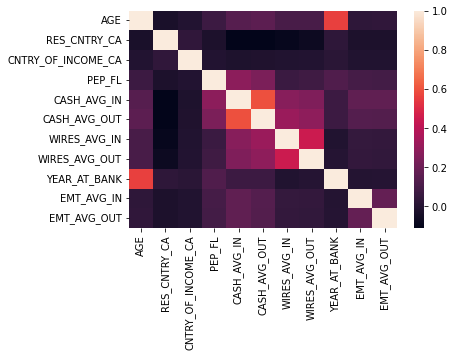

In [78]:
sns.heatmap(logreg_df_1.corr())

In [79]:
logreg_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  999372 non-null   object 
 2   RES_CNTRY_CA            1000000 non-null  int64  
 3   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 4   PEP_FL                  1000000 non-null  float64
 5   COUNTRY_RISK_INCOME     1000000 non-null  object 
 6   COUNTRY_RISK_RESIDENCY  1000000 non-null  object 
 7   occupation_risk         993616 non-null   object 
 8   CASH_AVG_IN             1000000 non-null  float64
 9   CASH_AVG_OUT            1000000 non-null  float64
 10  WIRES_AVG_IN            1000000 non-null  float64
 11  WIRES_AVG_OUT           1000000 non-null  float64
 12  YEAR_AT_BANK            995822 non-null   float64
 13  EMT_AVG_IN              241285 non-null   float64
 14  EMT

In [80]:
gender = {'Female': 0, 'Male': 1}
logreg_df_1['GENDER'] = logreg_df_1['GENDER'].replace(gender)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\2885161899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_1['GENDER'] = logreg_df_1['GENDER'].replace(gender)


In [81]:
risk_income = {'Low': 1, 'Moderate': 2, 'High': 3}
logreg_df_1['COUNTRY_RISK_INCOME'] = logreg_df_1['COUNTRY_RISK_INCOME'].replace(risk_income)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\1993668539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_1['COUNTRY_RISK_INCOME'] = logreg_df_1['COUNTRY_RISK_INCOME'].replace(risk_income)


In [82]:
risk_residency = {'Low': 1, 'Medium': 2, 'High': 3}
logreg_df_1['COUNTRY_RISK_RESIDENCY'] = logreg_df_1['COUNTRY_RISK_RESIDENCY'].replace(risk_income)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\1249018045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_1['COUNTRY_RISK_RESIDENCY'] = logreg_df_1['COUNTRY_RISK_RESIDENCY'].replace(risk_income)


In [83]:
risk_occupation = {'Low': 1, 'Moderate': 2, 'High': 3}
logreg_df_1['occupation_risk'] = logreg_df_1['occupation_risk'].replace(risk_occupation)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\239596123.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_1['occupation_risk'] = logreg_df_1['occupation_risk'].replace(risk_occupation)


In [84]:
logreg_df_1['EMT_AVG_IN'] = logreg_df_1['EMT_AVG_IN'].fillna(0)
logreg_df_1['EMT_AVG_OUT'] = logreg_df_1['EMT_AVG_OUT'].fillna(0)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\1415453001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_1['EMT_AVG_IN'] = logreg_df_1['EMT_AVG_IN'].fillna(0)
C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\1415453001.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_1['EMT_AVG_OUT'] = logreg_df_1['EMT_AVG_OUT'].fillna(0)


In [85]:
logreg_df_1['YEAR_AT_BANK'] = logreg_df_1['YEAR_AT_BANK'].fillna(0)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\2016649976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_1['YEAR_AT_BANK'] = logreg_df_1['YEAR_AT_BANK'].fillna(0)


In [86]:
logreg_df_1['occupation_risk'] = logreg_df_1['occupation_risk'].fillna(3)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\99914365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_1['occupation_risk'] = logreg_df_1['occupation_risk'].fillna(3)


In [87]:
logreg_df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  999372 non-null   float64
 2   RES_CNTRY_CA            1000000 non-null  int64  
 3   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 4   PEP_FL                  1000000 non-null  float64
 5   COUNTRY_RISK_INCOME     1000000 non-null  int64  
 6   COUNTRY_RISK_RESIDENCY  1000000 non-null  int64  
 7   occupation_risk         1000000 non-null  float64
 8   CASH_AVG_IN             1000000 non-null  float64
 9   CASH_AVG_OUT            1000000 non-null  float64
 10  WIRES_AVG_IN            1000000 non-null  float64
 11  WIRES_AVG_OUT           1000000 non-null  float64
 12  YEAR_AT_BANK            1000000 non-null  float64
 13  EMT_AVG_IN              1000000 non-null  float64
 14  EMT

In [88]:
logreg_df_1['GENDER'] = logreg_df_1['GENDER'].fillna(0 or 1)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\3327823524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_1['GENDER'] = logreg_df_1['GENDER'].fillna(0 or 1)


In [89]:
logreg_df_1

,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,CASH_AVG_IN,CASH_AVG_OUT,WIRES_AVG_IN,WIRES_AVG_OUT,YEAR_AT_BANK,EMT_AVG_IN,EMT_AVG_OUT,RISK
0,41,0.0,1,1,0.0,1,1,3.0,1288.892500,407.380429,1141.516129,692.685714,15.0,0.000000,0.000000,low
1,29,1.0,1,1,0.0,1,1,3.0,1517.751000,320.399800,3722.750000,1292.361842,3.0,0.000000,0.000000,low
2,60,1.0,1,1,0.0,1,1,3.0,1617.571000,316.619000,1272.000000,1679.900000,11.0,0.000000,0.000000,low
3,24,0.0,1,1,0.0,1,1,3.0,717.408400,242.617875,2102.154930,444.941176,21.0,0.000000,0.000000,low
4,81,0.0,1,1,0.0,1,1,3.0,862.762000,306.910907,961.645833,1041.127778,10.0,0.000000,0.000000,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,84,1.0,0,1,0.0,1,3,1.0,1894.510800,1533.809524,47458.680000,14655.735632,28.0,5002.493403,3418.392838,high
999996,52,1.0,0,1,0.0,1,1,1.0,825.085857,334.382733,4613.283019,1240.332344,27.0,2955.912041,0.000000,low
999997,64,0.0,0,1,0.0,1,3,3.0,1175.627500,841.947368,44474.573529,7653.072581,12.0,4287.453681,9927.441977,high
999998,39,1.0,0,1,0.0,1,3,3.0,3414.076625,679.800000,104830.777778,31369.083333,10.0,9419.317616,588.008938,high


In [90]:
logreg_df_1.corr()

,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,CASH_AVG_IN,CASH_AVG_OUT,WIRES_AVG_IN,WIRES_AVG_OUT,YEAR_AT_BANK,EMT_AVG_IN,EMT_AVG_OUT
AGE,1.000000,-0.001304,-0.033416,-0.007505,0.066777,0.010838,0.028502,0.045434,0.136867,0.155423,0.097969,0.099182,0.556491,0.021365,0.023353
GENDER,-0.001304,1.000000,-0.000251,-0.000650,-0.000463,0.000275,0.000062,-0.000434,0.000850,0.001650,0.000857,-0.001027,-0.001155,0.000960,0.001248
RES_CNTRY_CA,-0.033416,-0.000251,1.000000,0.029049,-0.026723,-0.045916,-0.822196,-0.027102,-0.106989,-0.111000,-0.091244,-0.076092,0.025983,-0.022970,-0.024501
CNTRY_OF_INCOME_CA,-0.007505,-0.000650,0.029049,1.000000,-0.007470,-0.535350,-0.027045,-0.005277,-0.020929,-0.019386,-0.013199,-0.010371,0.010423,-0.009262,-0.008777
PEP_FL,0.066777,-0.000463,-0.026723,-0.007470,1.000000,0.015592,0.022235,0.071916,0.280009,0.236818,0.061895,0.071642,0.118707,0.079436,0.078722
COUNTRY_RISK_INCOME,0.010838,0.000275,-0.045916,-0.535350,0.015592,1.000000,0.042173,0.010325,0.035999,0.031992,0.020651,0.016285,-0.016628,0.014977,0.016217
COUNTRY_RISK_RESIDENCY,0.028502,0.000062,-0.822196,-0.027045,0.022235,0.042173,1.000000,0.022538,0.090335,0.091401,0.074298,0.062696,-0.022252,0.023988,0.023737
occupation_risk,0.045434,-0.000434,-0.027102,-0.005277,0.071916,0.010325,0.022538,1.000000,0.139277,0.136477,0.054333,0.049820,0.025536,0.035214,0.033772
CASH_AVG_IN,0.136867,0.000850,-0.106989,-0.020929,0.280009,0.035999,0.090335,0.139277,1.000000,0.594949,0.267537,0.247047,0.062795,0.139692,0.138302
CASH_AVG_OUT,0.155423,0.001650,-0.111000,-0.019386,0.236818,0.031992,0.091401,0.136477,0.594949,1.000000,0.317431,0.284192,0.065295,0.112239,0.110942


<AxesSubplot:>

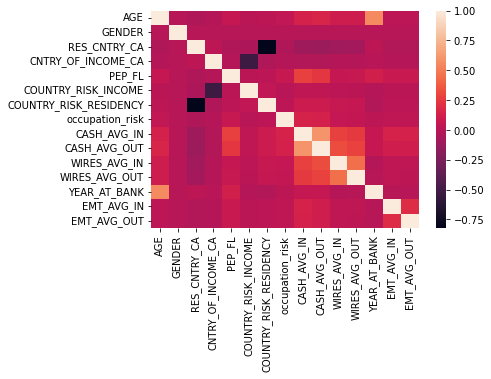

In [91]:
sns.heatmap(logreg_df_1.corr())

In [92]:
X = logreg_df_1.drop('RISK', axis = 1)
y = logreg_df_1['RISK']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [94]:
logreg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

In [95]:
X_train

,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,CASH_AVG_IN,CASH_AVG_OUT,WIRES_AVG_IN,WIRES_AVG_OUT,YEAR_AT_BANK,EMT_AVG_IN,EMT_AVG_OUT
760648,43,0.0,1,1,0.0,1,1,1.0,3164.833333,1243.000000,1.356160e+05,24724.000000,6.0,452.339002,1574.270068
79333,69,0.0,1,1,0.0,1,1,3.0,2952.857143,1203.904762,4.930139e+04,3861.438356,34.0,0.000000,0.000000
771344,13,0.0,1,1,0.0,1,1,1.0,365.053000,273.660750,2.595684e+03,2956.625000,4.0,0.000000,0.000000
179102,35,1.0,1,1,0.0,1,1,1.0,608.615000,207.064222,4.197000e+03,784.775510,21.0,0.000000,0.000000
75318,31,0.0,1,1,1.0,1,1,3.0,4274.000000,271.000000,2.578419e+04,8069.161290,28.0,2960.223804,4285.575872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963395,66,0.0,1,1,1.0,1,1,3.0,767.800000,1603.812500,1.052234e+05,32111.344828,30.0,0.000000,0.000000
117952,66,1.0,1,1,0.0,1,1,3.0,2602.500000,1492.370370,1.745643e+05,13753.128141,24.0,0.000000,0.000000
435829,57,1.0,1,1,0.0,1,1,1.0,1994.000000,1853.000000,1.022718e+06,644589.000000,32.0,2395.979130,1539.144633
305711,32,1.0,1,1,0.0,1,1,1.0,1621.541667,3339.000000,1.161795e+05,30667.629371,10.0,0.000000,0.000000


In [96]:
y_train

760648    medium
79333     medium
771344       low
179102       low
75318     medium
           ...  
963395    medium
117952    medium
435829    medium
305711    medium
985772       low
Name: RISK, Length: 800000, dtype: object

In [97]:
logreg.fit(X_train, y_train)

C:\Users\ruiho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [98]:
y_pred = logreg.predict(X_test)

In [99]:
accuracy = accuracy_score(y_test, y_pred)

In [100]:
accuracy

0.88165

## Logistic Regression(Exclude EMT)

In [101]:
cols = ['AGE', 'GENDER', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'PEP_FL', 'COUNTRY_RISK_INCOME', 'COUNTRY_RISK_RESIDENCY', 'occupation_risk', 'CASH_AVG_IN', 'CASH_AVG_OUT', 'WIRES_AVG_IN', 'WIRES_AVG_OUT', 'YEAR_AT_BANK', 'RISK']
logreg_df_2 = new_df[cols]

In [102]:
logreg_df_2.corr()

,AGE,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,CASH_AVG_IN,CASH_AVG_OUT,WIRES_AVG_IN,WIRES_AVG_OUT,YEAR_AT_BANK
AGE,1.000000,-0.033416,-0.007505,0.066777,0.136867,0.155423,0.097969,0.099182,0.561433
RES_CNTRY_CA,-0.033416,1.000000,0.029049,-0.026723,-0.106989,-0.111000,-0.091244,-0.076092,0.026343
CNTRY_OF_INCOME_CA,-0.007505,0.029049,1.000000,-0.007470,-0.020929,-0.019386,-0.013199,-0.010371,0.010646
PEP_FL,0.066777,-0.026723,-0.007470,1.000000,0.280009,0.236818,0.061895,0.071642,0.119687
CASH_AVG_IN,0.136867,-0.106989,-0.020929,0.280009,1.000000,0.594949,0.267537,0.247047,0.063213
CASH_AVG_OUT,0.155423,-0.111000,-0.019386,0.236818,0.594949,1.000000,0.317431,0.284192,0.065683
WIRES_AVG_IN,0.097969,-0.091244,-0.013199,0.061895,0.267537,0.317431,1.000000,0.444820,-0.013489
WIRES_AVG_OUT,0.099182,-0.076092,-0.010371,0.071642,0.247047,0.284192,0.444820,1.000000,-0.000686
YEAR_AT_BANK,0.561433,0.026343,0.010646,0.119687,0.063213,0.065683,-0.013489,-0.000686,1.000000


<AxesSubplot:>

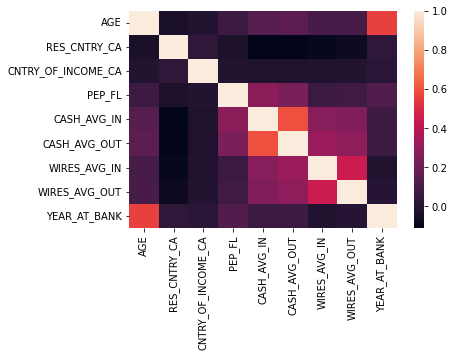

In [103]:
sns.heatmap(logreg_df_2.corr())

In [104]:
logreg_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  999372 non-null   object 
 2   RES_CNTRY_CA            1000000 non-null  int64  
 3   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 4   PEP_FL                  1000000 non-null  float64
 5   COUNTRY_RISK_INCOME     1000000 non-null  object 
 6   COUNTRY_RISK_RESIDENCY  1000000 non-null  object 
 7   occupation_risk         993616 non-null   object 
 8   CASH_AVG_IN             1000000 non-null  float64
 9   CASH_AVG_OUT            1000000 non-null  float64
 10  WIRES_AVG_IN            1000000 non-null  float64
 11  WIRES_AVG_OUT           1000000 non-null  float64
 12  YEAR_AT_BANK            995822 non-null   float64
 13  RISK                    1000000 non-null  object 
dtypes: 

In [105]:
gender = {'Female': 0, 'Male': 1}
logreg_df_2['GENDER'] = logreg_df_2['GENDER'].replace(gender)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\1020592672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_2['GENDER'] = logreg_df_2['GENDER'].replace(gender)


In [106]:
risk_income = {'Low': 1, 'Moderate': 2, 'High': 3}
logreg_df_2['COUNTRY_RISK_INCOME'] = logreg_df_2['COUNTRY_RISK_INCOME'].replace(risk_income)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\2447949523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_2['COUNTRY_RISK_INCOME'] = logreg_df_2['COUNTRY_RISK_INCOME'].replace(risk_income)


In [107]:
risk_residency = {'Low': 1, 'Medium': 2, 'High': 3}
logreg_df_2['COUNTRY_RISK_RESIDENCY'] = logreg_df_2['COUNTRY_RISK_RESIDENCY'].replace(risk_income)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\3495261146.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_2['COUNTRY_RISK_RESIDENCY'] = logreg_df_2['COUNTRY_RISK_RESIDENCY'].replace(risk_income)


In [108]:
risk_occupation = {'Low': 1, 'Moderate': 2, 'High': 3}
logreg_df_2['occupation_risk'] = logreg_df_2['occupation_risk'].replace(risk_occupation)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\605749370.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_2['occupation_risk'] = logreg_df_2['occupation_risk'].replace(risk_occupation)


In [109]:
logreg_df_2['YEAR_AT_BANK'] = logreg_df_2['YEAR_AT_BANK'].fillna(0)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\700069790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_2['YEAR_AT_BANK'] = logreg_df_2['YEAR_AT_BANK'].fillna(0)


In [110]:
logreg_df_2['occupation_risk'] = logreg_df_2['occupation_risk'].fillna(3)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\997071914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_2['occupation_risk'] = logreg_df_2['occupation_risk'].fillna(3)


In [111]:
logreg_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  999372 non-null   float64
 2   RES_CNTRY_CA            1000000 non-null  int64  
 3   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 4   PEP_FL                  1000000 non-null  float64
 5   COUNTRY_RISK_INCOME     1000000 non-null  int64  
 6   COUNTRY_RISK_RESIDENCY  1000000 non-null  int64  
 7   occupation_risk         1000000 non-null  float64
 8   CASH_AVG_IN             1000000 non-null  float64
 9   CASH_AVG_OUT            1000000 non-null  float64
 10  WIRES_AVG_IN            1000000 non-null  float64
 11  WIRES_AVG_OUT           1000000 non-null  float64
 12  YEAR_AT_BANK            1000000 non-null  float64
 13  RISK                    1000000 non-null  object 
dtypes: 

In [112]:
logreg_df_2['GENDER'] = logreg_df_2['GENDER'].fillna(0 or 1)

C:\Users\ruiho\AppData\Local\Temp\ipykernel_6804\354194291.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  logreg_df_2['GENDER'] = logreg_df_2['GENDER'].fillna(0 or 1)


In [113]:
logreg_df_2

,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,CASH_AVG_IN,CASH_AVG_OUT,WIRES_AVG_IN,WIRES_AVG_OUT,YEAR_AT_BANK,RISK
0,41,0.0,1,1,0.0,1,1,3.0,1288.892500,407.380429,1141.516129,692.685714,15.0,low
1,29,1.0,1,1,0.0,1,1,3.0,1517.751000,320.399800,3722.750000,1292.361842,3.0,low
2,60,1.0,1,1,0.0,1,1,3.0,1617.571000,316.619000,1272.000000,1679.900000,11.0,low
3,24,0.0,1,1,0.0,1,1,3.0,717.408400,242.617875,2102.154930,444.941176,21.0,low
4,81,0.0,1,1,0.0,1,1,3.0,862.762000,306.910907,961.645833,1041.127778,10.0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,84,1.0,0,1,0.0,1,3,1.0,1894.510800,1533.809524,47458.680000,14655.735632,28.0,high
999996,52,1.0,0,1,0.0,1,1,1.0,825.085857,334.382733,4613.283019,1240.332344,27.0,low
999997,64,0.0,0,1,0.0,1,3,3.0,1175.627500,841.947368,44474.573529,7653.072581,12.0,high
999998,39,1.0,0,1,0.0,1,3,3.0,3414.076625,679.800000,104830.777778,31369.083333,10.0,high


In [114]:
logreg_df_2.corr()

,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,CASH_AVG_IN,CASH_AVG_OUT,WIRES_AVG_IN,WIRES_AVG_OUT,YEAR_AT_BANK
AGE,1.000000,-0.001304,-0.033416,-0.007505,0.066777,0.010838,0.028502,0.045434,0.136867,0.155423,0.097969,0.099182,0.556491
GENDER,-0.001304,1.000000,-0.000251,-0.000650,-0.000463,0.000275,0.000062,-0.000434,0.000850,0.001650,0.000857,-0.001027,-0.001155
RES_CNTRY_CA,-0.033416,-0.000251,1.000000,0.029049,-0.026723,-0.045916,-0.822196,-0.027102,-0.106989,-0.111000,-0.091244,-0.076092,0.025983
CNTRY_OF_INCOME_CA,-0.007505,-0.000650,0.029049,1.000000,-0.007470,-0.535350,-0.027045,-0.005277,-0.020929,-0.019386,-0.013199,-0.010371,0.010423
PEP_FL,0.066777,-0.000463,-0.026723,-0.007470,1.000000,0.015592,0.022235,0.071916,0.280009,0.236818,0.061895,0.071642,0.118707
COUNTRY_RISK_INCOME,0.010838,0.000275,-0.045916,-0.535350,0.015592,1.000000,0.042173,0.010325,0.035999,0.031992,0.020651,0.016285,-0.016628
COUNTRY_RISK_RESIDENCY,0.028502,0.000062,-0.822196,-0.027045,0.022235,0.042173,1.000000,0.022538,0.090335,0.091401,0.074298,0.062696,-0.022252
occupation_risk,0.045434,-0.000434,-0.027102,-0.005277,0.071916,0.010325,0.022538,1.000000,0.139277,0.136477,0.054333,0.049820,0.025536
CASH_AVG_IN,0.136867,0.000850,-0.106989,-0.020929,0.280009,0.035999,0.090335,0.139277,1.000000,0.594949,0.267537,0.247047,0.062795
CASH_AVG_OUT,0.155423,0.001650,-0.111000,-0.019386,0.236818,0.031992,0.091401,0.136477,0.594949,1.000000,0.317431,0.284192,0.065295


<AxesSubplot:>

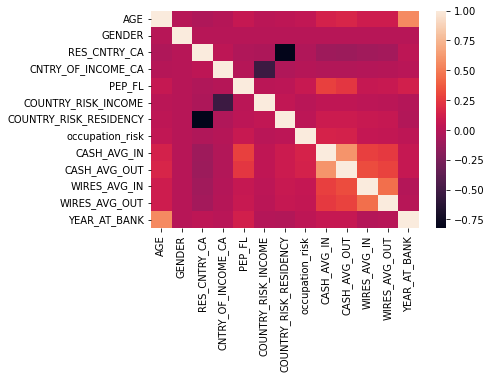

In [115]:
sns.heatmap(logreg_df_2.corr())

In [116]:
X = logreg_df_2.drop('RISK', axis = 1)
y = logreg_df_2['RISK']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [118]:
logreg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')

In [119]:
X_train

,AGE,GENDER,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,PEP_FL,COUNTRY_RISK_INCOME,COUNTRY_RISK_RESIDENCY,occupation_risk,CASH_AVG_IN,CASH_AVG_OUT,WIRES_AVG_IN,WIRES_AVG_OUT,YEAR_AT_BANK
760648,43,0.0,1,1,0.0,1,1,1.0,3164.833333,1243.000000,1.356160e+05,24724.000000,6.0
79333,69,0.0,1,1,0.0,1,1,3.0,2952.857143,1203.904762,4.930139e+04,3861.438356,34.0
771344,13,0.0,1,1,0.0,1,1,1.0,365.053000,273.660750,2.595684e+03,2956.625000,4.0
179102,35,1.0,1,1,0.0,1,1,1.0,608.615000,207.064222,4.197000e+03,784.775510,21.0
75318,31,0.0,1,1,1.0,1,1,3.0,4274.000000,271.000000,2.578419e+04,8069.161290,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
963395,66,0.0,1,1,1.0,1,1,3.0,767.800000,1603.812500,1.052234e+05,32111.344828,30.0
117952,66,1.0,1,1,0.0,1,1,3.0,2602.500000,1492.370370,1.745643e+05,13753.128141,24.0
435829,57,1.0,1,1,0.0,1,1,1.0,1994.000000,1853.000000,1.022718e+06,644589.000000,32.0
305711,32,1.0,1,1,0.0,1,1,1.0,1621.541667,3339.000000,1.161795e+05,30667.629371,10.0


In [120]:
y_train

760648    medium
79333     medium
771344       low
179102       low
75318     medium
           ...  
963395    medium
117952    medium
435829    medium
305711    medium
985772       low
Name: RISK, Length: 800000, dtype: object

In [121]:
logreg.fit(X_train, y_train)

C:\Users\ruiho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [122]:
y_pred = logreg.predict(X_test)

In [123]:
accuracy = accuracy_score(y_test, y_pred)

In [124]:
accuracy

0.91142

## Decision Tree

In [125]:
columns = ['AGE', 'GENDER', 'occupation_risk', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'COUNTRY_RISK_RESIDENCY', 'COUNTRY_RISK_INCOME', 'PEP_FL', 'CASH_AVG_IN', 'CASH_AVG_OUT', 'WIRES_AVG_IN', 'WIRES_AVG_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
DT_df = logreg_df_1[columns]

In [126]:
DT_df

,AGE,GENDER,occupation_risk,RES_CNTRY_CA,CNTRY_OF_INCOME_CA,COUNTRY_RISK_RESIDENCY,COUNTRY_RISK_INCOME,PEP_FL,CASH_AVG_IN,CASH_AVG_OUT,WIRES_AVG_IN,WIRES_AVG_OUT,YEAR_AT_BANK,EMT_AVG_IN,EMT_AVG_OUT,RISK
0,41,0.0,3.0,1,1,1,1,0.0,1288.892500,407.380429,1141.516129,692.685714,15.0,0.000000,0.000000,low
1,29,1.0,3.0,1,1,1,1,0.0,1517.751000,320.399800,3722.750000,1292.361842,3.0,0.000000,0.000000,low
2,60,1.0,3.0,1,1,1,1,0.0,1617.571000,316.619000,1272.000000,1679.900000,11.0,0.000000,0.000000,low
3,24,0.0,3.0,1,1,1,1,0.0,717.408400,242.617875,2102.154930,444.941176,21.0,0.000000,0.000000,low
4,81,0.0,3.0,1,1,1,1,0.0,862.762000,306.910907,961.645833,1041.127778,10.0,0.000000,0.000000,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,84,1.0,1.0,0,1,3,1,0.0,1894.510800,1533.809524,47458.680000,14655.735632,28.0,5002.493403,3418.392838,high
999996,52,1.0,1.0,0,1,1,1,0.0,825.085857,334.382733,4613.283019,1240.332344,27.0,2955.912041,0.000000,low
999997,64,0.0,3.0,0,1,3,1,0.0,1175.627500,841.947368,44474.573529,7653.072581,12.0,4287.453681,9927.441977,high
999998,39,1.0,3.0,0,1,3,1,0.0,3414.076625,679.800000,104830.777778,31369.083333,10.0,9419.317616,588.008938,high


In [127]:
DT_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   AGE                     1000000 non-null  int64  
 1   GENDER                  1000000 non-null  float64
 2   occupation_risk         1000000 non-null  float64
 3   RES_CNTRY_CA            1000000 non-null  int64  
 4   CNTRY_OF_INCOME_CA      1000000 non-null  int64  
 5   COUNTRY_RISK_RESIDENCY  1000000 non-null  int64  
 6   COUNTRY_RISK_INCOME     1000000 non-null  int64  
 7   PEP_FL                  1000000 non-null  float64
 8   CASH_AVG_IN             1000000 non-null  float64
 9   CASH_AVG_OUT            1000000 non-null  float64
 10  WIRES_AVG_IN            1000000 non-null  float64
 11  WIRES_AVG_OUT           1000000 non-null  float64
 12  YEAR_AT_BANK            1000000 non-null  float64
 13  EMT_AVG_IN              1000000 non-null  float64
 14  EMT

In [128]:
X = DT_df.drop('RISK', axis = 1)
y = DT_df['RISK']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [137]:
clf = DecisionTreeClassifier(max_depth = 5).fit(X, y)

[Text(0.5, 0.9166666666666666, 'X[10] <= 12886.045\ngini = 0.515\nsamples = 1000000\nvalue = [50000, 600000, 350000]'),
 Text(0.25, 0.75, 'X[9] <= 902.997\ngini = 0.068\nsamples = 610105\nvalue = [7394, 588815, 13896]'),
 Text(0.125, 0.5833333333333334, 'X[7] <= 0.5\ngini = 0.018\nsamples = 589958\nvalue = [2737, 584555, 2666]'),
 Text(0.0625, 0.4166666666666667, 'X[8] <= 1893.852\ngini = 0.01\nsamples = 587641\nvalue = [1809, 584555, 1277]'),
 Text(0.03125, 0.25, 'X[8] <= 1551.821\ngini = 0.004\nsamples = 581373\nvalue = [699, 580197, 477]'),
 Text(0.015625, 0.08333333333333333, 'gini = 0.002\nsamples = 572190\nvalue = [325, 571641, 224]'),
 Text(0.046875, 0.08333333333333333, 'gini = 0.129\nsamples = 9183\nvalue = [374, 8556, 253]'),
 Text(0.09375, 0.25, 'X[9] <= 599.971\ngini = 0.469\nsamples = 6268\nvalue = [1110, 4358, 800]'),
 Text(0.078125, 0.08333333333333333, 'gini = 0.205\nsamples = 4534\nvalue = [249, 4028, 257]'),
 Text(0.109375, 0.08333333333333333, 'gini = 0.619\nsamples 

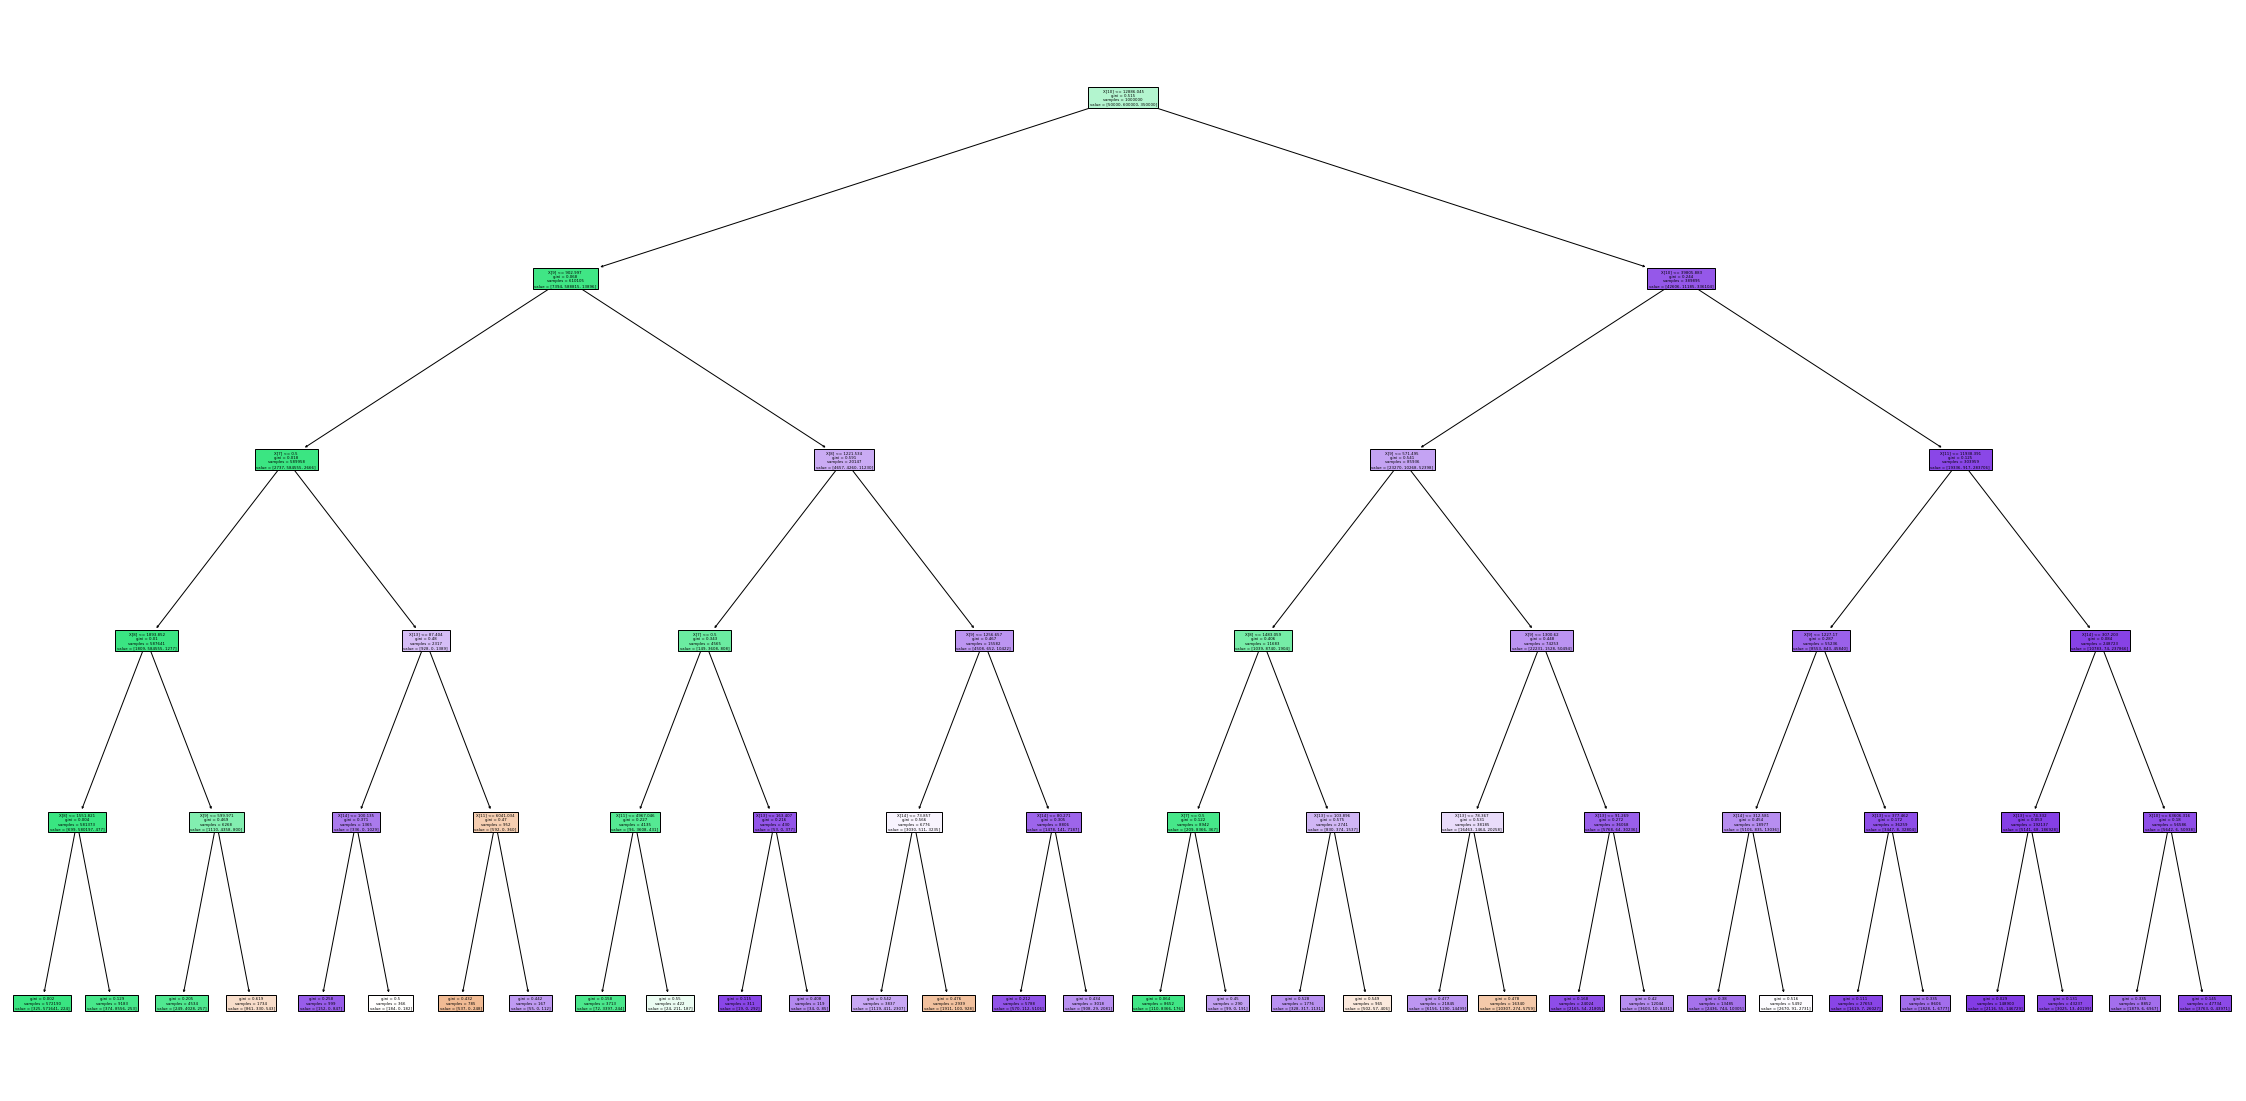

In [138]:
fig, ax = plt.subplots(figsize = (40, 20))
plot_tree(clf, filled = True, ax = ax)

In [139]:
y_pred = clf.predict(X_test)

In [140]:
accuracy = clf.score(X_test, y_test)

In [141]:
accuracy

0.951815

In [135]:
importances = clf.feature_importances_

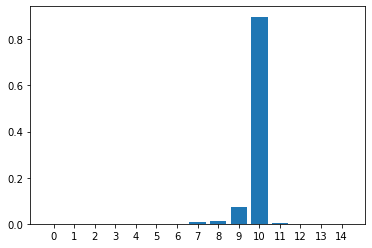

In [136]:
fig, ax = plt.subplots()
ax.bar(range(X.shape[1]), importances)
ax.set_xticks(range(X.shape[1]))

## Random Forest

In [144]:
columns = ['AGE', 'GENDER', 'occupation_risk', 'RES_CNTRY_CA', 'CNTRY_OF_INCOME_CA', 'COUNTRY_RISK_RESIDENCY', 'COUNTRY_RISK_INCOME', 'PEP_FL', 'CASH_AVG_IN', 'CASH_AVG_OUT', 'WIRES_AVG_IN', 'WIRES_AVG_OUT', 'YEAR_AT_BANK', 'EMT_AVG_IN', 'EMT_AVG_OUT', 'RISK']
RF_df = DT_df[columns]

In [145]:
X = RF_df.drop('RISK', axis = 1)
y = RF_df['RISK']

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [147]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 1)

In [149]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [150]:
y_pred = rf.predict(X_test)

In [152]:
accuracy = accuracy_score(y_test, y_pred)

In [153]:
accuracy

0.96106

## Neural Network